In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("CompleteDataSet.csv",low_memory=False,skiprows=[1])

In [3]:
data=df[['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20','Activity']]



In [4]:
data["BeltAccelerometer"]=data["BeltAccelerometer"].astype("float")
data["Unnamed: 16"]=data["Unnamed: 16"].astype("float")
data["Unnamed: 17"]=data["Unnamed: 17"].astype("float")
data["BeltAngularVelocity"]=data["BeltAngularVelocity"].astype("float")
data["Unnamed: 19"]=data["Unnamed: 19"].astype("float")
data["Unnamed: 20"]=data["Unnamed: 20"].astype("float")
data["Activity"]=data["Activity"].astype("float")


C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [5]:
Walking=data[data["Activity"]==6].head(8872)
Standing=data[data["Activity"]==7].head(8872)
Sitting=data[data["Activity"]==8].head(8872)
Laying=data[data["Activity"]==11].head(8872)
Jumping=data[data["Activity"]==10].head(8872)
Falling_sideways=data[data["Activity"]==4].head(8872)
Falling_backwards=data[data["Activity"]==3].head(8872)
Falling_forward_using_hands=data[data["Activity"]==1].head(8872)
Falling_forward_using_knees=data[data["Activity"]==2].head(8872)
Falling_sitting_in_empty_chair=data[data["Activity"]==5].head(8872)
Picking_up_an_object=data[data["Activity"]==9].head(8872)


In [6]:
bal_data=pd.DataFrame()
bal_data=bal_data.append([Walking,Standing,Sitting,Laying,Jumping,Falling_sideways,Falling_backwards,
                          Falling_forward_using_hands,Falling_forward_using_knees,Falling_sitting_in_empty_chair,
                          Picking_up_an_object])
print(bal_data["Activity"].value_counts())
np.shape(bal_data)

7.0     8872
5.0     8872
9.0     8872
4.0     8872
11.0    8872
3.0     8872
10.0    8872
2.0     8872
1.0     8872
8.0     8872
6.0     8872
Name: Activity, dtype: int64


(97592, 7)

In [7]:
x=bal_data[['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20']]
y=bal_data["Activity"]

In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
bal_data['label'] = label.fit_transform(bal_data['Activity'])
bal_data.head()

,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,Activity,label
2832,0.125,0.909,0.526,34.451,-8.354,-33.232,6.0,5
2833,0.280,1.057,0.640,-31.463,-24.024,-0.549,6.0,5
2834,0.280,1.057,0.640,1.220,-26.524,27.927,6.0,5
2835,0.335,1.095,0.394,34.634,-10.427,16.280,6.0,5
2836,0.335,1.095,0.394,-58.171,5.000,-2.744,6.0,5


In [9]:
X = bal_data[['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20']]
y = bal_data['label']

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(data = X, columns = ['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20'])


X

,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20
0,0.282292,1.383322,0.568042,0.384053,-0.079521,-0.458300
1,0.609097,1.579891,0.738009,-0.387567,-0.231992,-0.025111
2,0.609097,1.579891,0.738009,-0.004965,-0.256317,0.352317
3,0.725060,1.630361,0.371238,0.386195,-0.099691,0.197945
4,0.725060,1.630361,0.371238,-0.700223,0.050415,-0.054204
...,...,...,...,...,...,...
97587,-1.754439,0.733846,-0.763366,0.020731,-0.005358,0.000748
97588,-1.748113,0.739158,-0.761875,0.014304,-0.002984,-0.001664
97589,-1.748113,0.739158,-0.761875,-0.009963,-0.010106,-0.016217
97590,-1.748113,0.731189,-0.769330,0.001450,-0.002984,-0.008132


In [11]:
from sklearn import svm
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [12]:
X_train.shape,y_train.shape

((68314, 6), (68314,))

In [13]:
X_test.shape,y_test.shape

((29278, 6), (29278,))

In [14]:
linear = svm.SVC(kernel='linear', verbose=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, verbose=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', gamma='auto', degree=3, verbose=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid',verbose=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

[LibSVM][LibSVM][LibSVM]

C:\Users\Rupali\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

In [15]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [16]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)


In [17]:
print(accuracy_lin)
print(accuracy_poly)
print(accuracy_rbf)
print(accuracy_sig)

0.43165516770271195
0.4994876699228089
0.7583509802582143
0.2576678734886263


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rbf_pred)

array([[1838,  315,   13,   20,  114,   27,   65,    0,  152,  118,    0],
       [ 694, 1314,   19,   46,   14,   38,   59,   40,  307,  131,    0],
       [  31,   61, 1216,  146,  345,   28,   35,   12,  247,  155,  385],
       [  20,   63,   66, 1816,   27,   57,  103,   41,  326,  140,    3],
       [  43,   61,  494,   88, 1130,   31,   25,   99,  212,  109,  369],
       [   9,   24,    0,   17,    4, 2513,   27,    0,   65,    3,    0],
       [   0,    2,    0,    2,    0,   20, 2616,    0,   22,    0,    0],
       [   1,    0,    0,   16,    8,    1,    4, 2627,    4,    0,    1],
       [  58,  164,   15,   47,   12,   54,  229,    2, 2044,   37,    0],
       [  14,   17,    7,   19,    6,   49,   13,    0,   49, 2487,    0],
       [   1,    0,   40,    7,   11,    0,    0,    0,    0,    0, 2602]],
      dtype=int64)

In [19]:
y_test.shape

(29278,)

In [20]:
y_test.value_counts()

8     2662
7     2662
6     2662
5     2662
3     2662
1     2662
0     2662
10    2661
9     2661
4     2661
2     2661
Name: label, dtype: int64

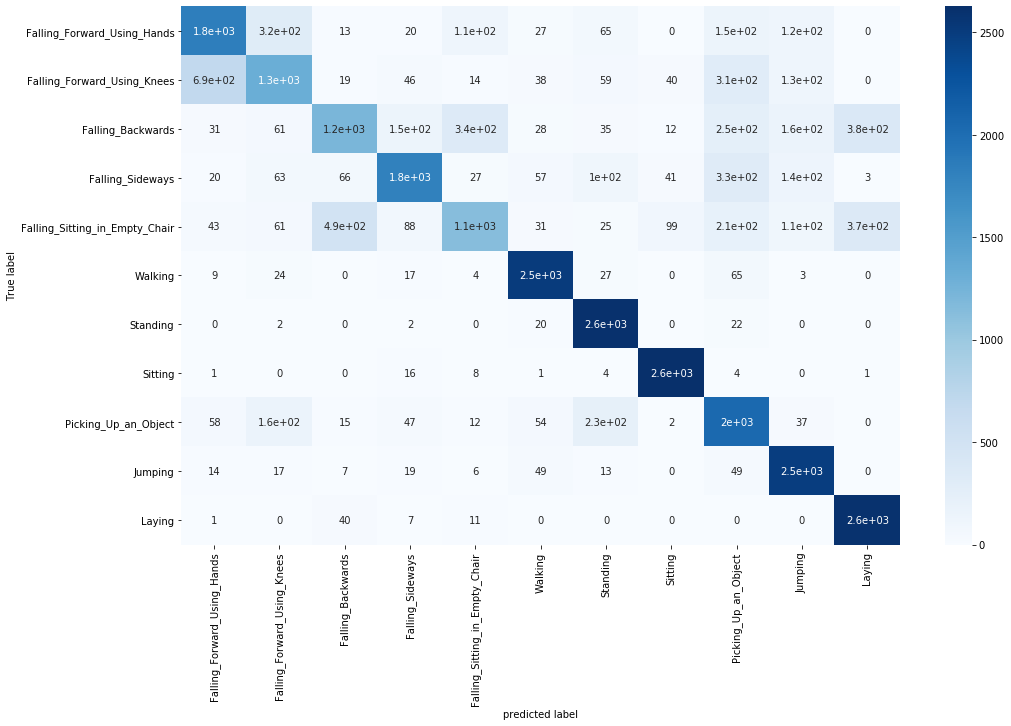

In [25]:
import seaborn as sns
cm = confusion_matrix(y_test, rbf_pred)
axis_labels = ['Falling_Forward_Using_Hands','Falling_Forward_Using_Knees','Falling_Backwards','Falling_Sideways','Falling_Sitting_in_Empty_Chair','Walking','Standing','Sitting','Picking_Up_an_Object','Jumping','Laying']
figure = plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm),0,0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.show()